In [1]:
import math
from scipy.optimize import minimize
import numpy as np
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bounds = [(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,100),(0,100),(0,100),(0,1)]
X_optimal = [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1]
y_optimal = -15
def G01(X):
    y = 5*(X[0]+X[1]+X[2]+X[3])-5*(X[0]**2+X[1]**2+X[2]**2+X[3]**2)-(X[4]+X[5]+X[6]+X[7]+X[8]+X[9]+X[10]+X[11]+X[12])
    g1 = 2*X[0]+2*X[1]+X[9]+X[10]-10
    g2 = 2*X[0]+2*X[2]+X[9]+X[11]-10
    g3 = 2*X[1]+2*X[2]+X[10]+X[11]-10
    g4 = -8*X[0]+X[9]
    g5 = -8*X[1]+X[10]
    g6 = -8*X[2]+X[11]
    g7 = -2*X[3]-X[4]+X[9]
    g8 = -2*X[5]-X[6]+X[10]
    g9 = -2*X[7]-X[8]+X[11]
    return y,g1,g2,g3,g4,g5,g6,g7,g8,g9

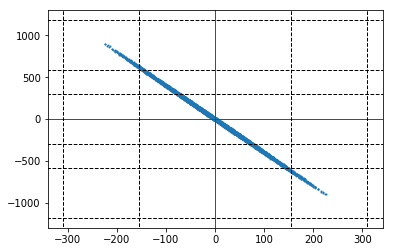

In [3]:
pN = 100
dim = 13
keth = 0.5
eta = 0.5
X = np.zeros((pN, dim))
fmax = 310
vmax = 1182
for i in range(pN):
    for j in range(dim):
        X[i][j] = bounds[j][0]+(bounds[j][1]-bounds[j][0])*np.random.random()

fs = []    
Vs = []
for i in range(pN):
    for j in range(pN):
        if i != j:
            deltaf = G01(X[i])[0] - G01(X[j])[0]
            delraV = np.sum(G01(X[i])[1:10])-np.sum(G01(X[j])[1:10])
            fs.append(deltaf)
            Vs.append(delraV)

plt.scatter(fs,Vs,s=1)
plt.axhline(y=vmax, xmin=-fmax, xmax=fmax, color = "black", ls="--", lw="1")
plt.axhline(y=-vmax, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=0, xmin=-fmax, xmax=fmax, color = "red", ls="-", lw="1")

plt.axvline(x=fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=0, ymin=-vmax, ymax=vmax, color = "red",ls="-", lw="1")

plt.show()